<h1 style="color: purple;">ANALISI DEI DUE PICCHI DEL BULK: C240830</h1>

<hr style="border: 3px solid purple;">

## IMPORTAZIONI

---

In [1]:
from picchi_C240830 import raccoglitore_bulk
from analisi_subroutines import *

<hr style="border: 3px solid purple;">

## ESTRAZIONE DEI PICCHI

---

Nella key Regione 1 (che è una list) è contenuta un'unica quadrupla (mu, 0, sigma, A) che corrisponde all'unico picco presente: quello dell'AlGaAs. Nella key Regione 2 sono presenti due picchi. L'unico d'interesse è quello che dà la gaussiana più alta, il criterio per scegliere tra i due picchi è quindi selezionare quello che dà una gaussiana con massimo maggiore fra i due.

#### Funzioni

In [2]:
def estrai_picco_regione_1 (lista_picchi):
    
    ## REGIONE 1 ##
    A, mu, sigma = lista_picchi[0][3], lista_picchi[0][0], lista_picchi[0][2]
    
    return (A, mu, sigma)

def estrai_picco_regione_2 (lista_picchi):
    
    ## REGIONE 2 ##
    A1, mu1, sigma1 = lista_picchi[0][3], lista_picchi[0][0], lista_picchi[0][2]
    A2, mu2, sigma2 = lista_picchi[1][3], lista_picchi[1][0], lista_picchi[1][2]
    
    x = np.linspace(800, 850, 50)
    
    # calcolo le due gaussiane
    y1 = gaussiana(x, A1, mu1, sigma1)
    y2 = gaussiana(x, A2, mu2, sigma2)
    
    # estraggo i due massimi
    max1 = np.max(y1)
    max2 = np.max(y2)
    
    # a seconda di quale dei due è maggiore, restituisco uno oppure l'altro
    if max1 > max2:
        return (A1, mu1, sigma1)
    else:
        return (A2, mu2, sigma2)

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Contenitori per i picchi

In [3]:
picchi_regione_1 = {}
picchi_regione_2 = {}

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Estrazione tramite funzioni

In [4]:
for ass in d_o_ass:
    ass = 'ass=' + ass 
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        emi = 'emi=' + emi
        
        picchi_regione_1[ass+emi] = []
        picchi_regione_2[ass+emi] = []
        
        for i, temp in enumerate(arr_temperatura):
            
            picco1 = estrai_picco_regione_1 (raccoglitore_bulk[ass][emi][i]['Regione 1'])
            picchi_regione_1[ass+emi].append(picco1)
            
            picco2 = estrai_picco_regione_2 (raccoglitore_bulk[ass][emi][i]['Regione 2'])
            picchi_regione_2[ass+emi].append(picco2)

Ora i picchi sono contenuti in picchi_regione_x, che è una lista di triple (A, mu, sigma). 

In picchi_regione_1 ci sono 4 picchi, perché a 100K e 150K non si osservano, mentre in picchi_regione_2 ci sono tutti e 6.

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Conversione in eV

È un'iterazione in più inutile, ma almeno rende il codice più leggibile. Stavolta nelle list ci sono delle quadruple (A, mu, sigma, err_mu); l'errore su mu è calcolato a partire dalla risoluzione dell'apparato.

In [5]:
picchi_1_ev = {}
picchi_2_ev = {}

In [6]:
for ass in d_o_ass:
    ass = 'ass=' + ass 
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        emi = 'emi=' + emi
        
        picchi_1_ev[ass+emi] = []
        picchi_2_ev[ass+emi] = []

        for i, temp in enumerate(arr_temperatura):
            
            A1 = picchi_regione_1[ass+emi][i][0]
            
            if np.isnan(A1):
                picchi_1_ev[ass+emi].append((np.nan, np.nan, np.nan, np.nan))
            else:
                mu1 = picchi_regione_1[ass+emi][i][1]
                sigma1 = picchi_regione_1[ass+emi][i][2]
                err_mu1 = err_lambda_to_E(mu1, 0.7508320802)
                
                picchi_1_ev[ass+emi].append((A1, lambda_to_E(mu1), err_lambda_to_E(mu1, sigma1), err_mu1))
                
            A2 = picchi_regione_2[ass+emi][i][0]
            mu2 = picchi_regione_2[ass+emi][i][1]
            sigma2 = picchi_regione_2[ass+emi][i][2]
            err_mu2 = err_lambda_to_E(mu2, 0.7508320802)
            
            picchi_2_ev[ass+emi].append((A2, lambda_to_E(mu2), err_lambda_to_E(mu2, sigma2), err_mu2))

<hr style="border: 3px solid purple;">

## FUNZIONI PER PLOT

### PER PLOT SU T

Usare: plot_su_T (picchi, option, x=None, d_o_ass=None, d_o_emi=None, arr_temperatura=None, col=None, materiale=None)

---

### PER PLOT SU INT

Usare: plot_su_int (picchi, option, x=None, d_o_ass=None, d_o_emi=None, arr_temperatura=None, col=None, materiale=None)

<hr style="border: 3px solid purple;"> 

## PLOT ENERGIA

---

### SU TEMPERATURA

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

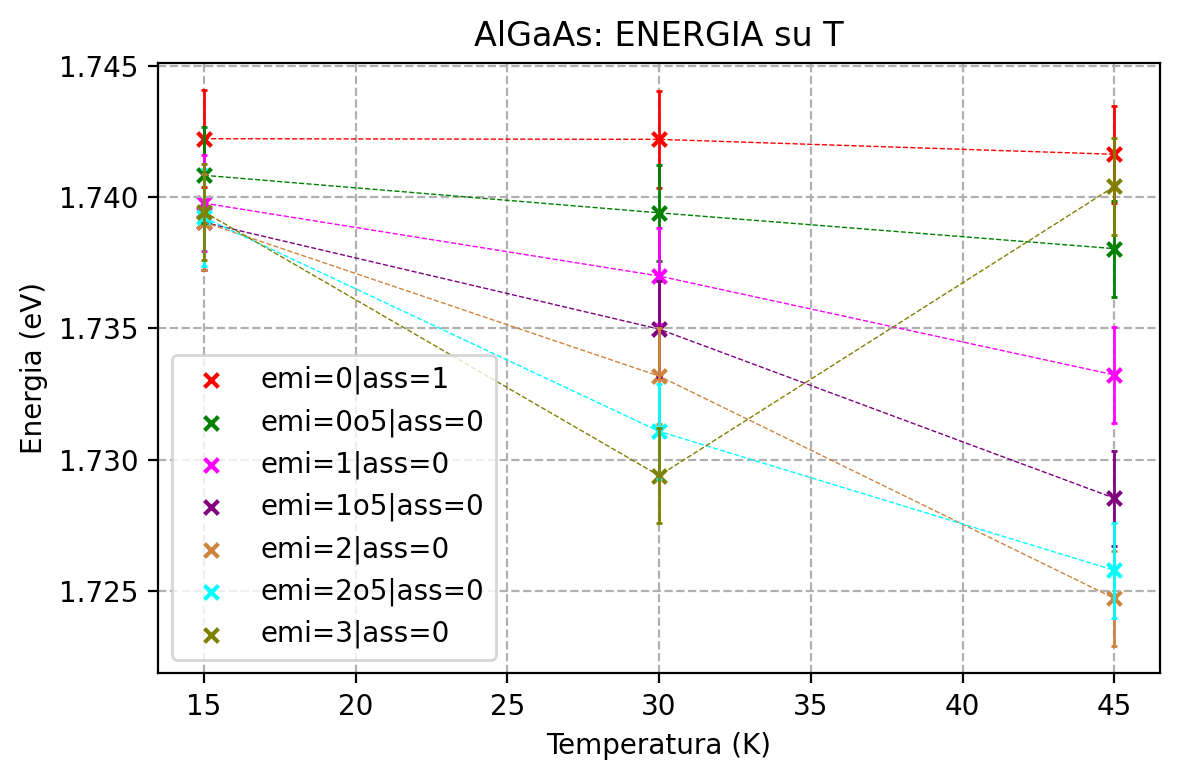

In [7]:
plot_su_T(picchi_1_ev, 'mu', col=col, materiale='AlGaAs')

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

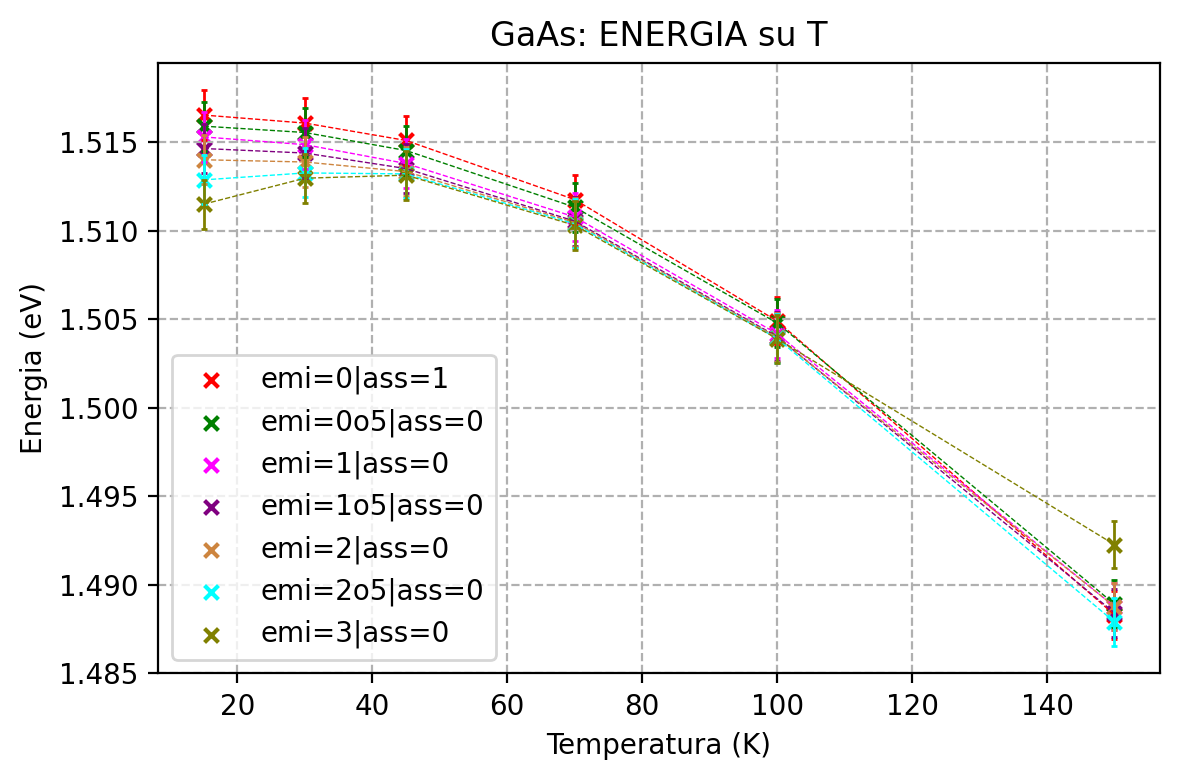

In [8]:
plot_su_T(picchi_2_ev, 'mu', col=col, materiale='GaAs')

---

### SU INTENSITÀ

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

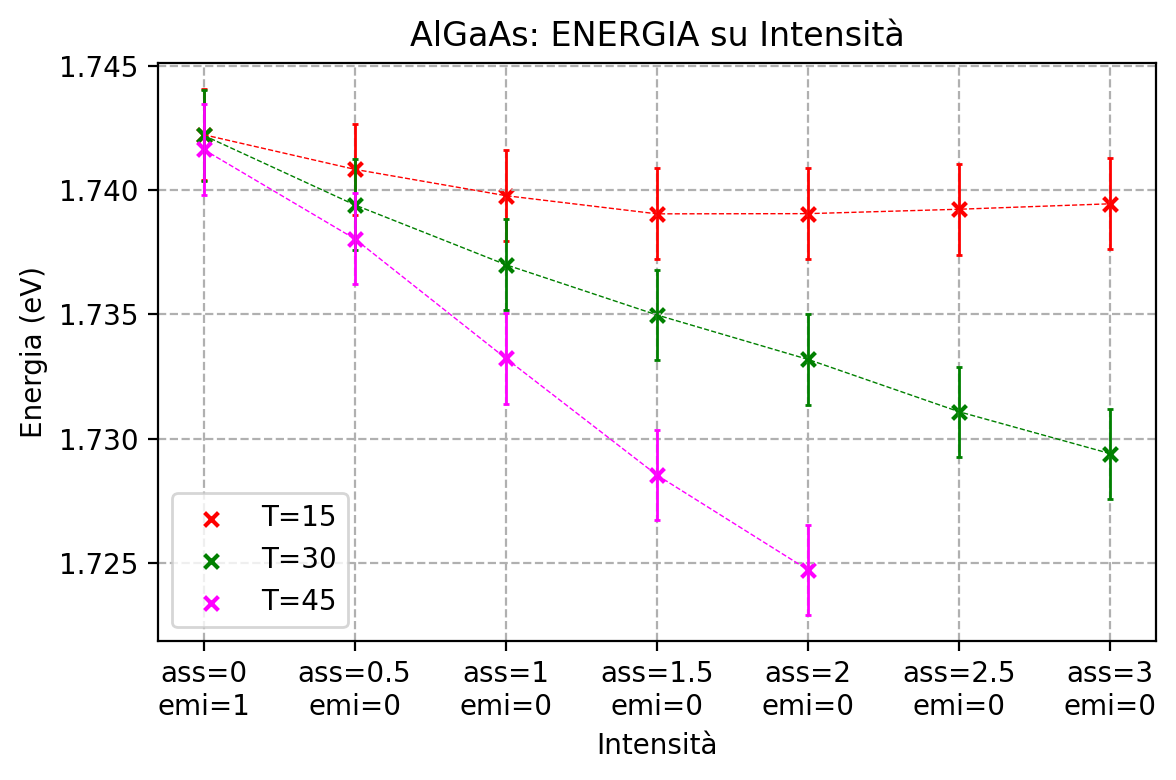

In [9]:
plot_su_int(picchi_1_ev, 'mu', col=col, materiale='AlGaAs', arr_temperatura=[15,30,45])

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

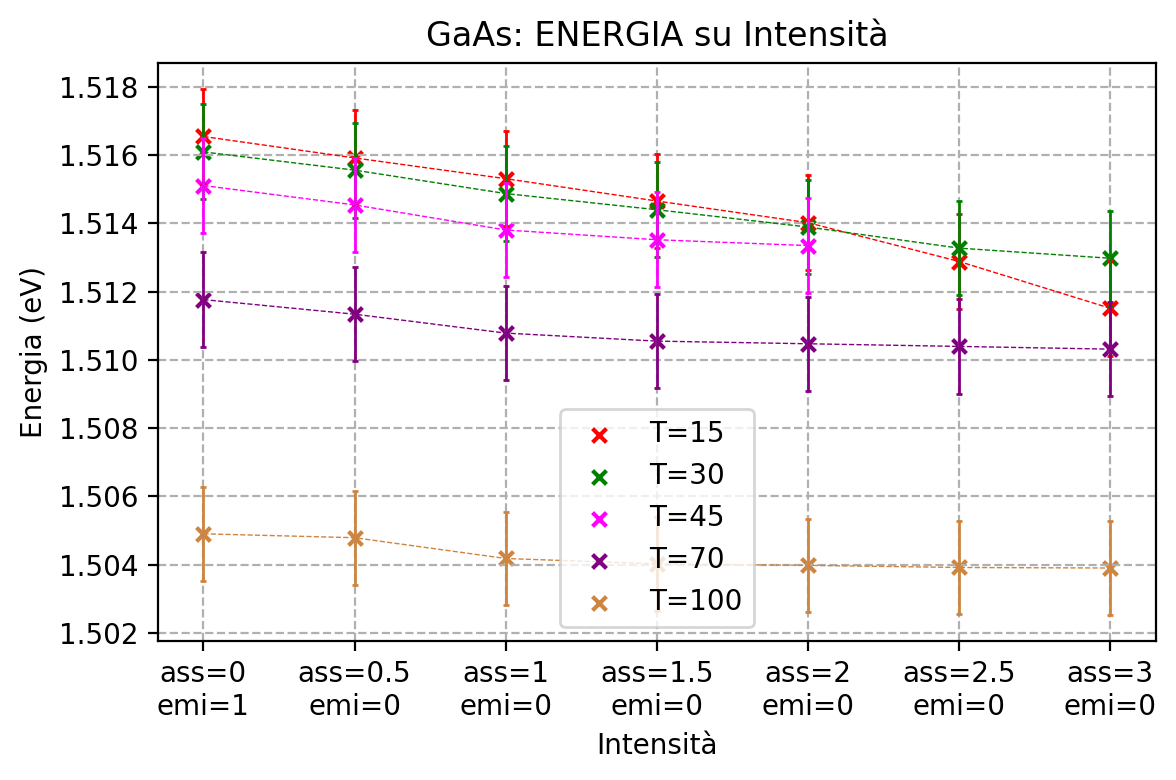

In [10]:
plot_su_int(picchi_2_ev, 'mu', col=col, materiale='GaAs', arr_temperatura=[15,30,45,70,100])

<hr style="border: 3px solid purple;">

## PLOT FWHM

---

### SU TEMPERATURA

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

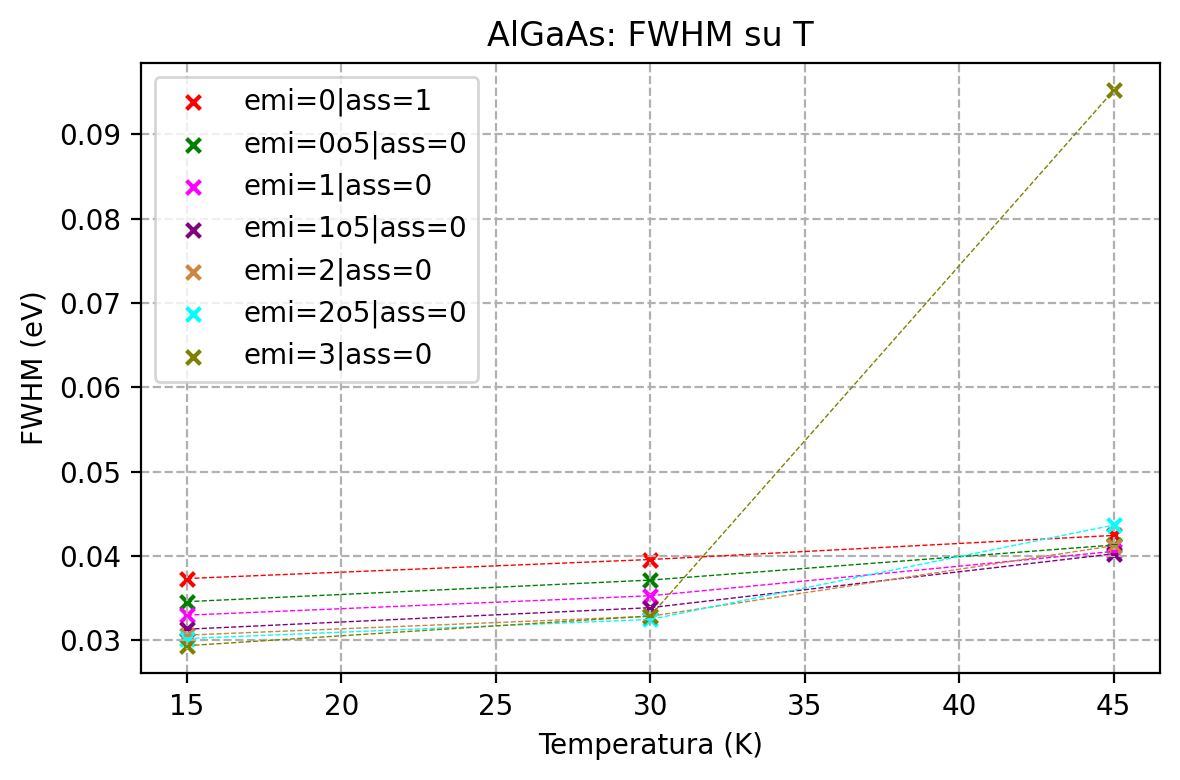

In [11]:
plot_su_T(picchi_1_ev, 'fwhm', col=col, materiale='AlGaAs')

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

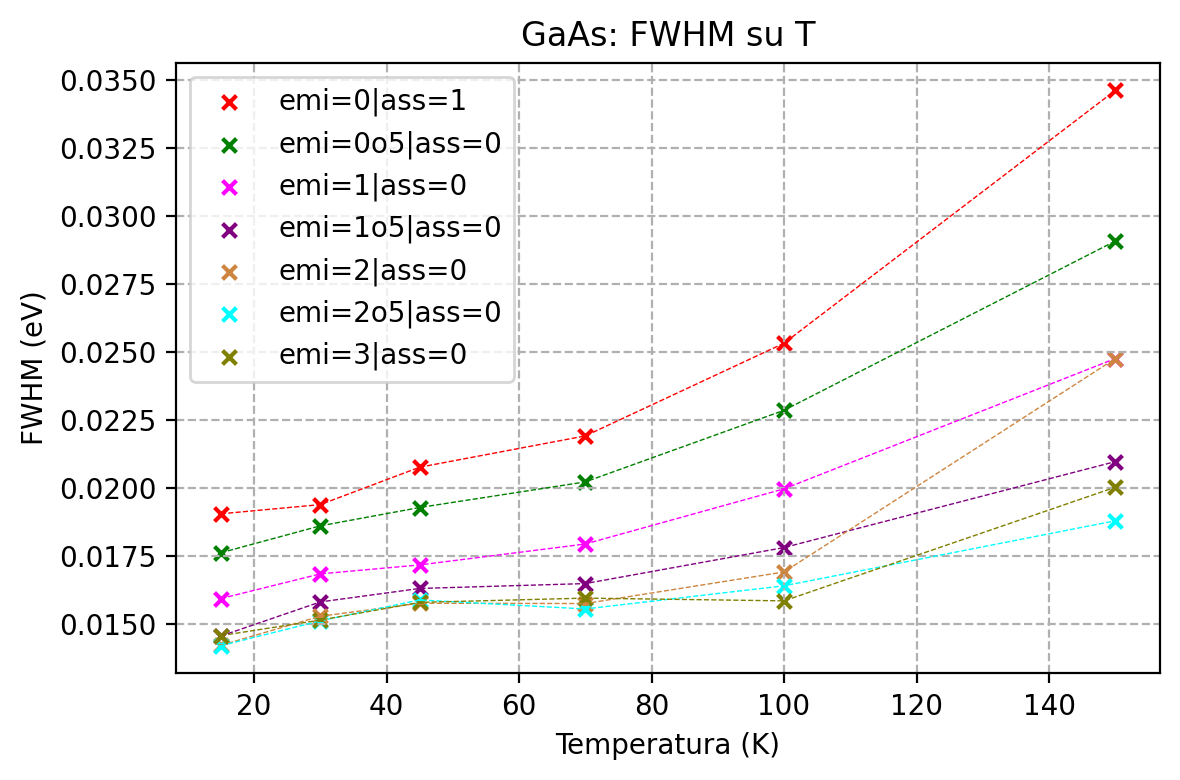

In [12]:
plot_su_T(picchi_2_ev, 'fwhm', col=col, materiale='GaAs')

---

### SU INTENSITÀ

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

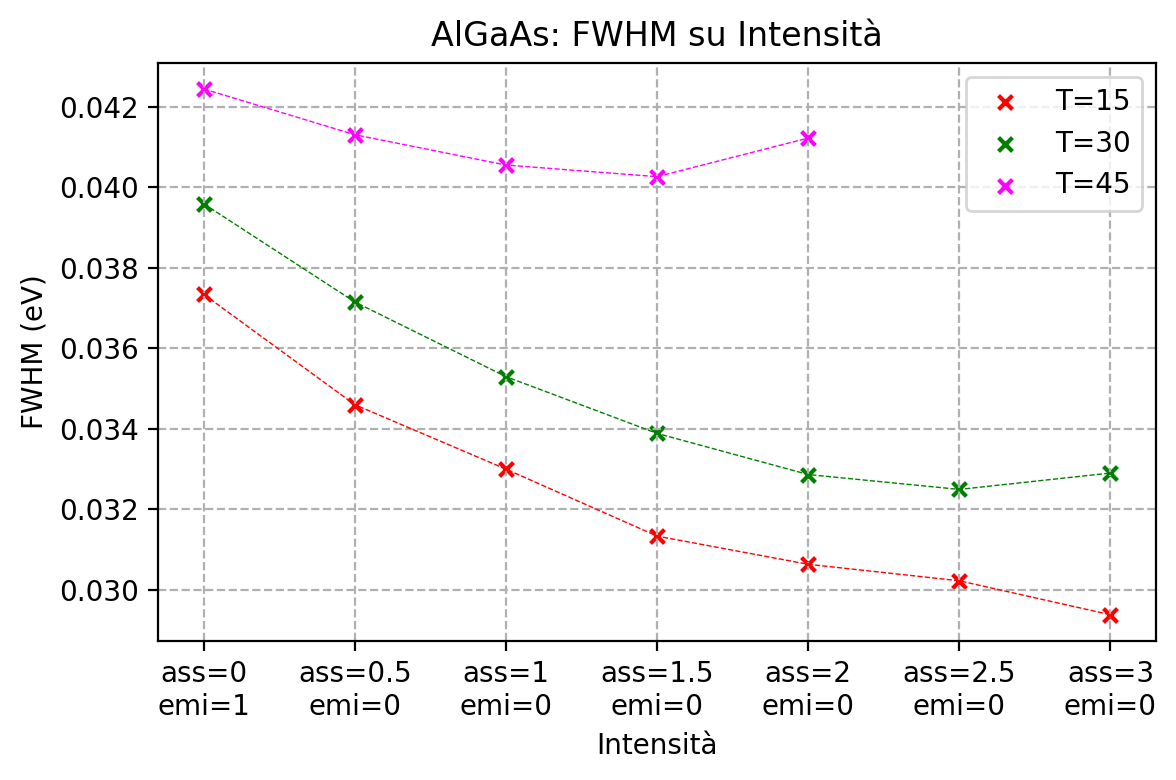

In [13]:
plot_su_int(picchi_1_ev, 'fwhm', col=col, materiale='AlGaAs', arr_temperatura=[15,30,45])

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

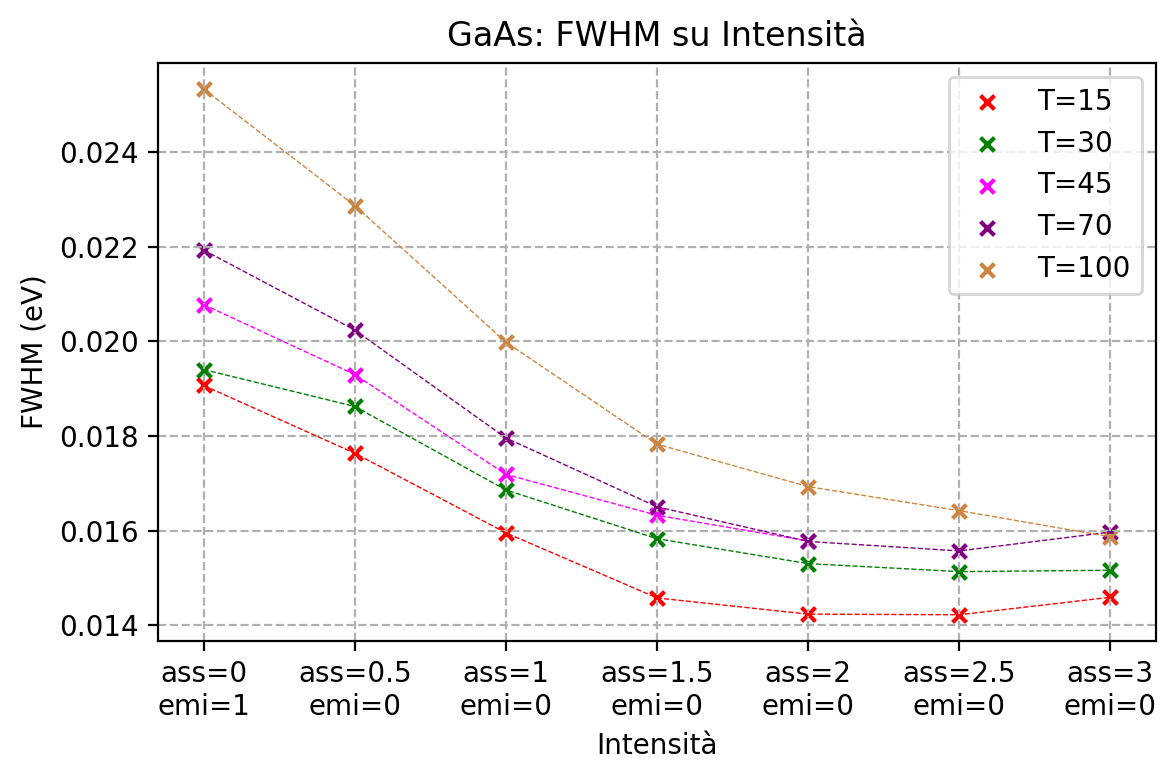

In [14]:
plot_su_int(picchi_2_ev, 'fwhm', col=col, materiale='GaAs', arr_temperatura=[15,30,45,70,100])

<hr style="border: 3px solid purple;">

## PLOT AREA

---

### SU TEMPERATURA

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

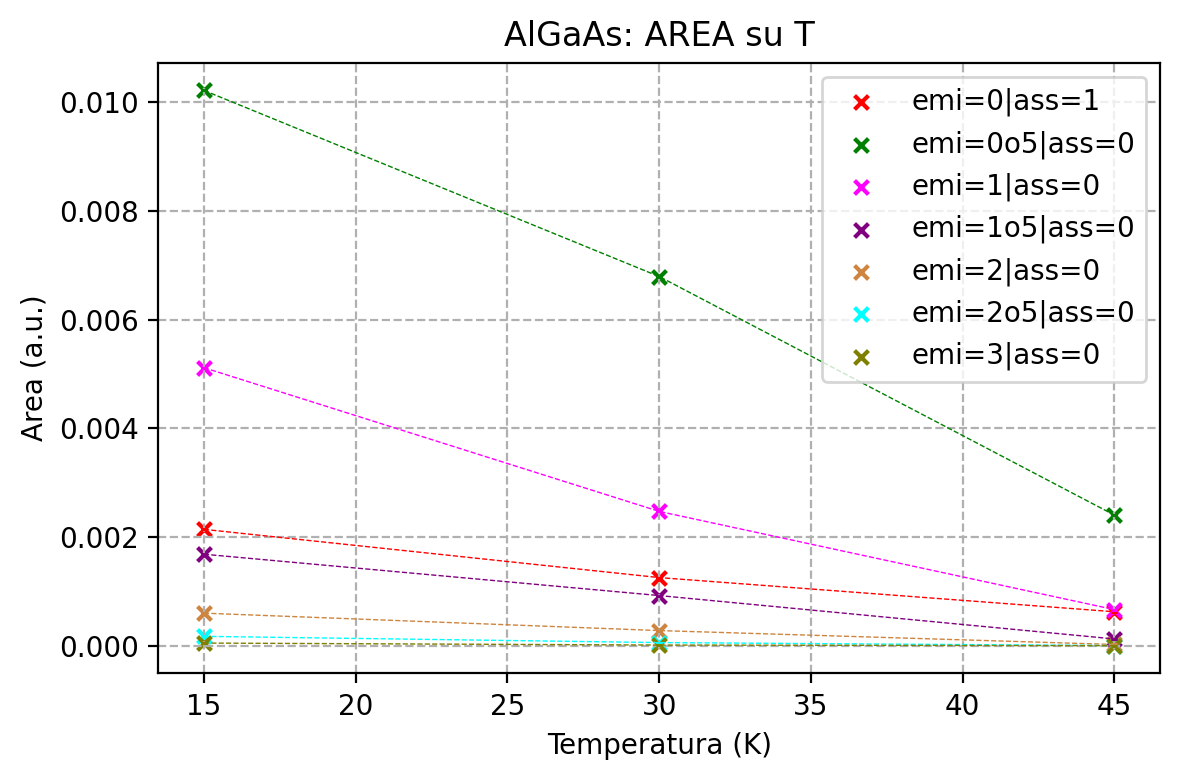

In [15]:
plot_su_T(picchi_1_ev, 'area', col=col, materiale='AlGaAs')

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

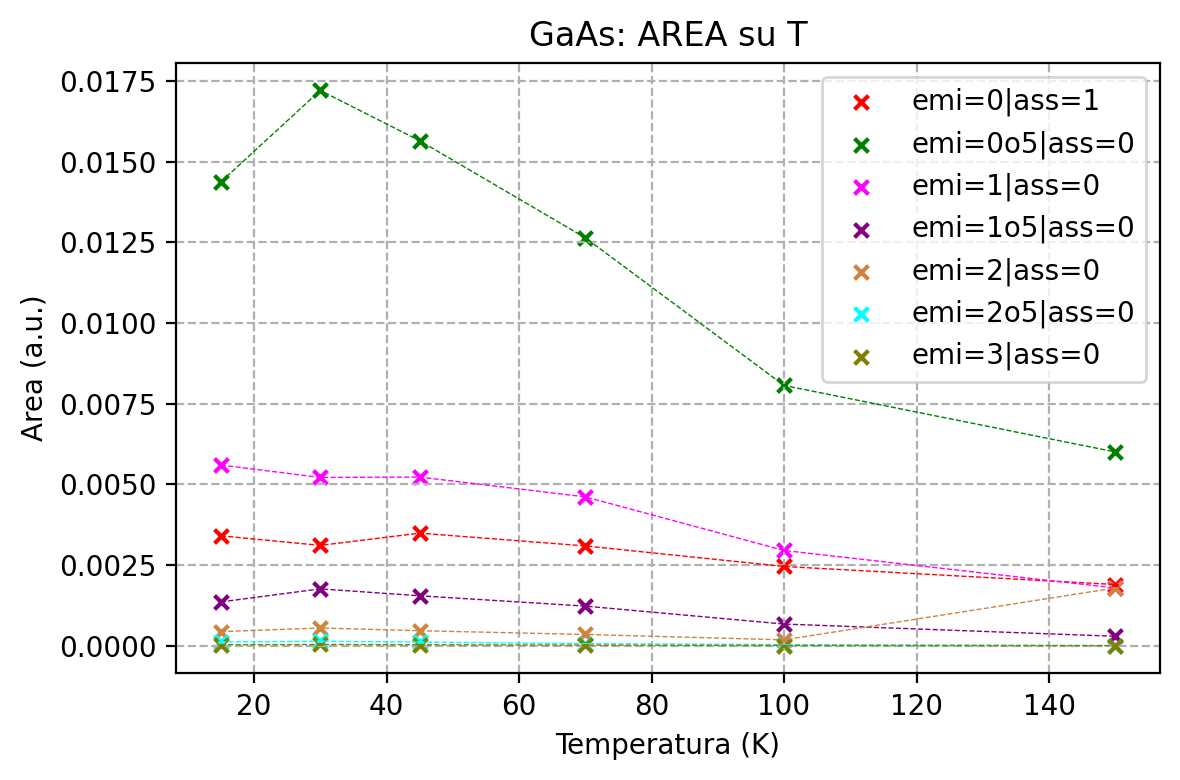

In [16]:
plot_su_T(picchi_2_ev, 'area', col=col, materiale='GaAs')

---

### SU INTENSITÀ

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco AlGaAs

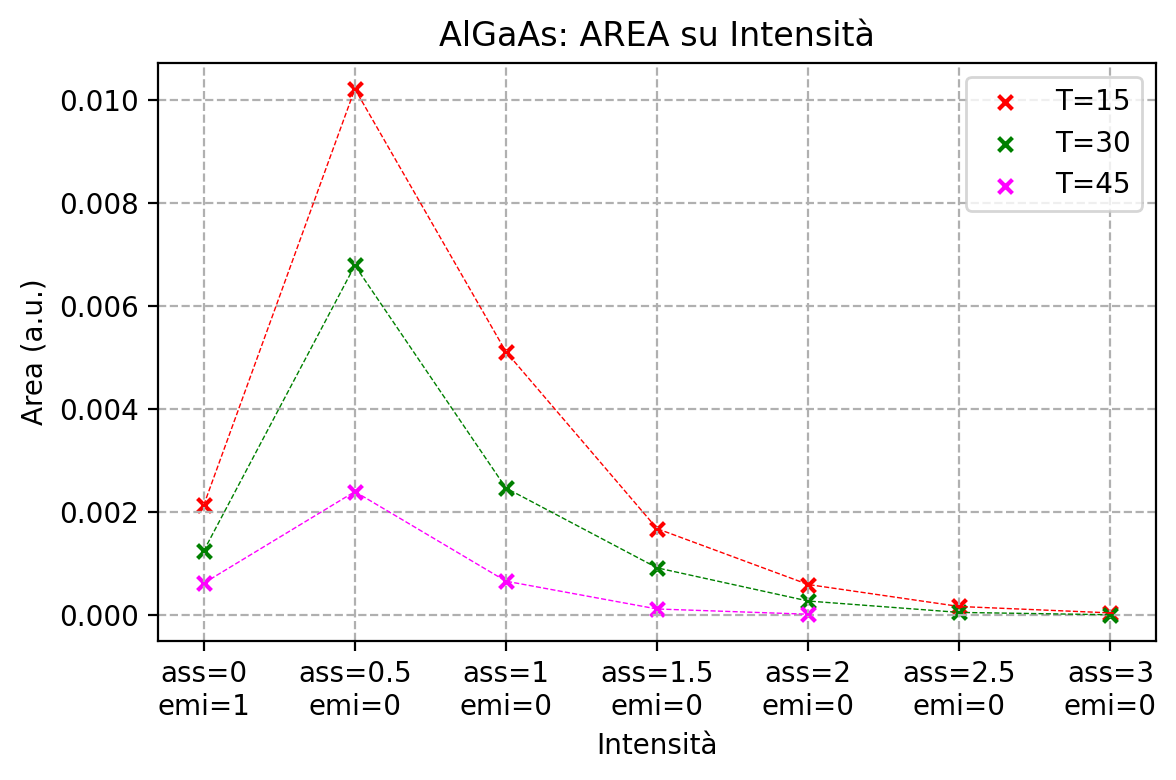

In [17]:
plot_su_int(picchi_1_ev, 'area', col=col, materiale='AlGaAs', arr_temperatura=[15,30,45])

<hr style="height: 2px; background: repeating-linear-gradient(to right, black, black 5px, transparent 5px, transparent 10px); border: none;">

#### Picco GaAs

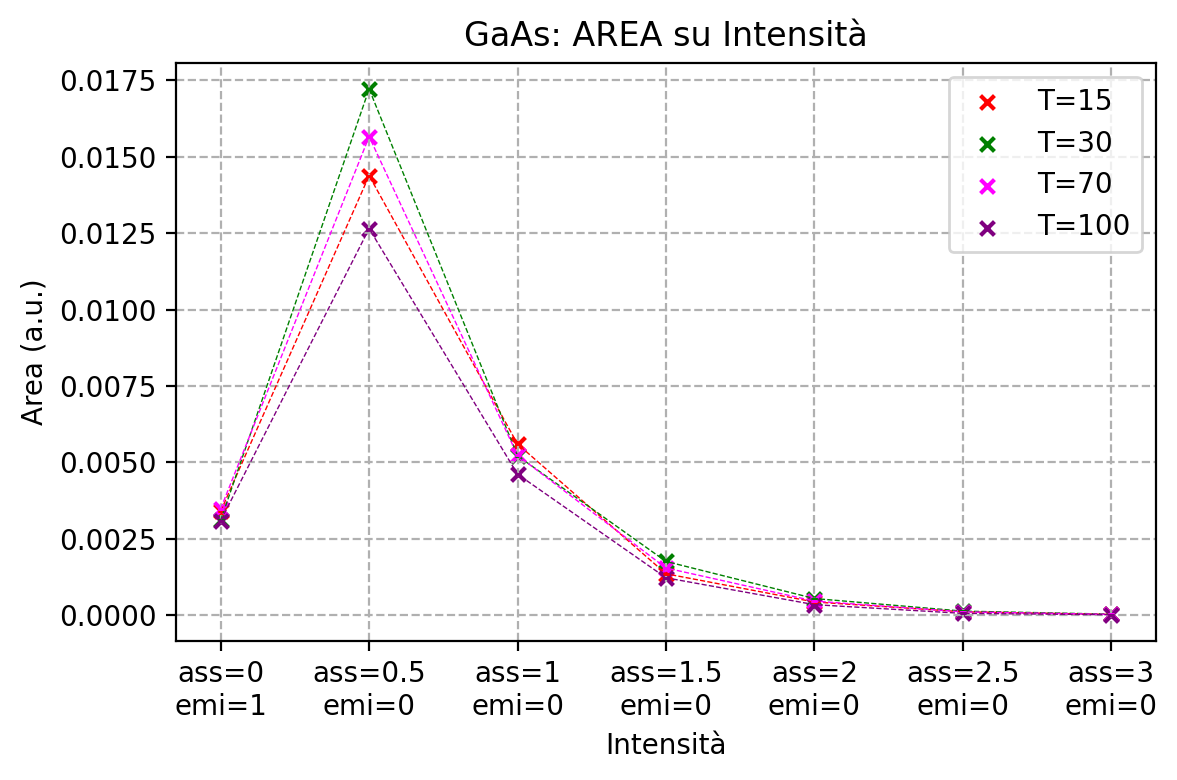

In [18]:
plot_su_int(picchi_2_ev, 'area', col=col, materiale='GaAs', arr_temperatura=[15,30,70,100])

<hr style="border: 3px solid purple;">